The parturbative 2-to-2 parton-parton differential cross section diverges like $1/p_T^4$. In QCD MC models such as Pythia regulate this divergence by including a cutoff $p_{T0}$:  $$1/p_T^4 \rightarrow 1/(p_{T}^{2} + p_{T0}^2)^2$$
But this $p_{T0}$ should have a dependance on $\sqrt{s}$:
$$p_{T0} = p_{T0}^{ref}(\sqrt{s} / \sqrt{s_0})^\epsilon$$

In [1]:
from __future__ import print_function ## print()
from __future__ import division ## 1/3 = 0.333 instead of 0

In [2]:
import math
def pT_wraper(p0, s0, epsilon):
    def pT(s):
        return p0*math.pow((s/s0), epsilon)
    return pT

In [3]:
herwig = pT_wraper(3.91, 7000., 0.33)
pythia = pT_wraper(2.28, 7000., 0.215)

In [4]:
import numpy as np

In [5]:
x = np.arange(1800, 14000, 20)
y_herwig = np.array([herwig(xx) for xx in x])
y_pythia = np.array([pythia(xx) for xx in x])

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

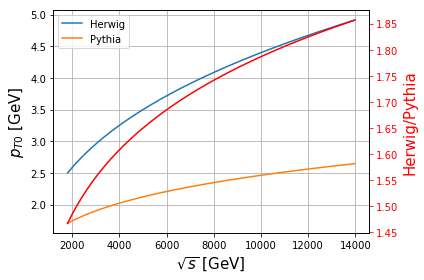

In [19]:
fig, ax1 = plt.subplots()
ax1.plot(x, y_herwig, label="Herwig")
ax1.plot(x, y_pythia, label="Pythia")
ax1.set_ylabel("$p_{T0}$ [GeV]", fontsize=15)
ax1.set_xlabel("$\sqrt{s}$ [GeV]", fontsize=15)
ax1.legend()
ax1.grid()

ax2 = ax1.twinx()
ax2.plot(x, y_herwig/y_pythia, label='Herwig/Pythia', color='r')
ax2.set_ylabel('Herwig/Pythia', fontsize=15, color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()